# Simulating at INST State

FreeFlux can estimate metabolic fluxes for organisms that uptake one-carbon compounds like autotrophs using carbon dioxide. For this, kinetics of intermediate MDVs are required at the isotopically non-stationary (INST) state. The derived MDVs will be a function of time.

To simulate MDVs at INST state, use the following commands, similar to those used for steady state:

In [1]:
from freeflux import Model

MODEL_FILE = 'path/to/reactions.tsv'

model = Model('demo')
model.read_from_file(MODEL_FILE)

isim = model.simulator('inst')
isim.set_target_EMUs({
    'Glu': [[1,2,3], '12345'], 
    'Cit': '2345'
})
isim.set_labeling_strategy(
    'AcCoA', 
    labeling_pattern = ['01', '11'], 
    percentage = [0.25, 0.25], 
    purity = [1, 1]
)

fluxes = {'v1': 10,
          'v2': 10,
          'v3': 5,
          'v4': 5,
          'v5': 5,
          'v6_f': 12.5,   # "_f" denotes forward flux
          'v6_b': 7.5,    # "_b" denotes backward flux
          'v7': 5}
for fluxid, value in fluxes.items():
    isim.set_flux(fluxid, value)

# or read from file 
FLUXES_FILE = 'path/to/fluxes.tsv'
isim.set_fluxes_from_file(FLUXES_FILE)

The input files can be found [here](https://github.com/Chaowu88/freeflux/tree/main/models/toy).

In addition to the fluxes, metabolite concentrations are also required for INST state simulation. The concentration of metabolites can be set as follows:

In [2]:
concs = {'OAA': 0.1,
         'Cit': 5,
         'AKG': 0.3,
         'Suc': 1,
         'Fum': 0.2,
         'Glu': 0.5}
for concid, value in concs.items():
    isim.set_concentration(concid, value)

# or read from file 
CONCS_FILE = 'path/to/concentrations.tsv'
isim.set_concentrations_from_file(CONCS_FILE)

Lastly, set the time points when MDVs will be simulated:

In [3]:
isim.set_timepoints([0, 0.1, 0.2, 0.5, 1, 2])

<div class="alert alert-info">

<b>Note:</b> <br></br> Units for flux, concentration, and timepoint are not specified in this toy example, but they should be included in practical examples.

</div>

Finally, to simulate the kinetics of MDVs, use the following code:

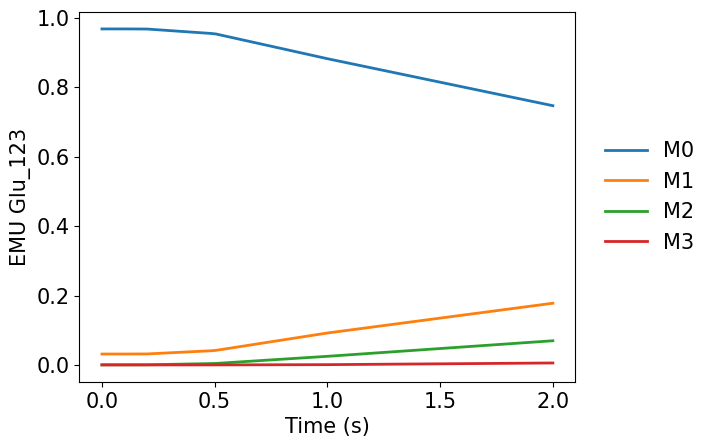

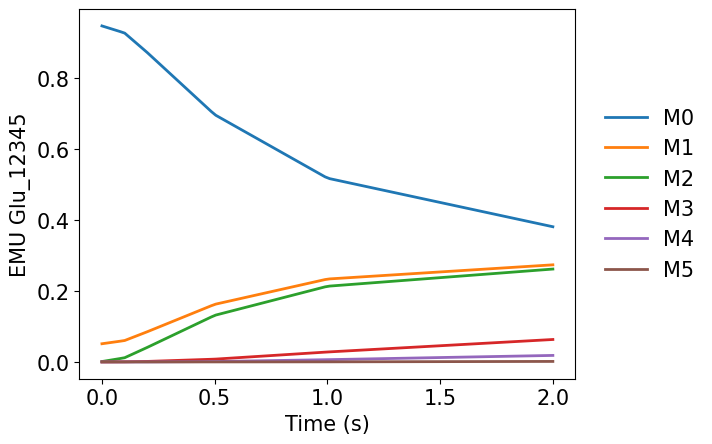

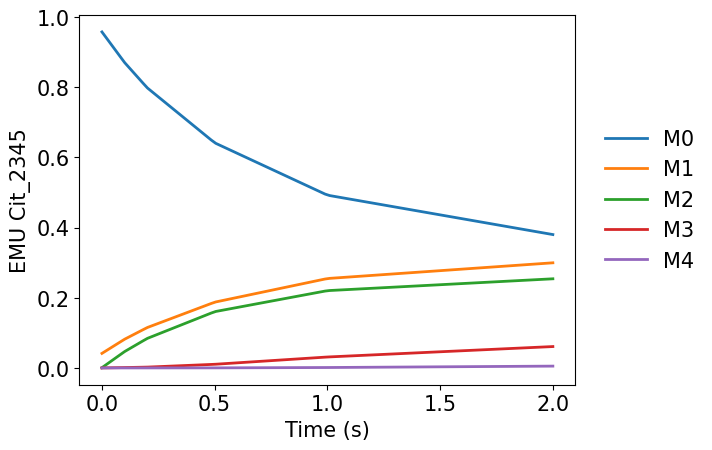

In [4]:
isim.prepare()
res = isim.simulate()

for emuid in ['Glu_123', 'Glu_12345', 'Cit_2345']:
    res.plot_MDV_kinetics(emuid, show_fig = True, output_dir = None)

Similarly, the work can be done using the `with` statement:

In [5]:
with model.simulator('inst') as isim:
    isim.set_target_EMUs({
        'Glu': [[1,2,3], '12345'], 
        'Cit': '2345'
    })
    isim.set_timepoints([0, 0.1, 0.2, 0.5, 1, 2])
    isim.set_labeling_strategy(
        'AcCoA', 
        labeling_pattern = ['01', '11'], 
        percentage = [0.25, 0.25], 
        purity = [1, 1]
    )
    isim.set_fluxes_from_file(FLUXES_FILE)
    isim.set_concentrations_from_file(CONCS_FILE)
    isim.prepare()
    res = isim.simulate()

A more complex example of simulation at INST state using an *Synechocystis* model is provided in the script "[tutorial_synechocystis_inst_simulation.py](https://github.com/Chaowu88/freeflux/tree/main/tutorials)"